In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## Check if the results in other working, transport and home cells can be extrapolated with previous experiment ##

#grid 3420 - working area
#grid 3322 - transport area
#grid 3319 - home area

hours_of_interest = [96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
normalized = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

dfs = pd.DataFrame({})

for i in range(4,10):
    df = pd.read_csv('./trento/sms-call-internet-tn-2013-11-0{}.csv'.format(i), parse_dates=['time'])
    dfs = pd.concat([dfs,df])
df = pd.read_csv('./trento/sms-call-internet-tn-2013-11-10.csv', parse_dates=['time'])
dfs = pd.concat([dfs,df])
dfs = dfs.fillna(0)
del(df)

In [3]:
#Group by hours and aggregate values according to the hour
dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
dfgr['hour'] = dfgr.time.dt.hour+dfgr.time.dt.minute/60+24*(dfgr.time.dt.day-1)
dfgr = dfgr.set_index(['hour']).sort_index()
del(dfs)

In [4]:
dfgr.head()

,time,cellid,smsin,smsout,callin,callout,internet
hour,,,,,,,
72.0,2013-11-04,38,0.262484,0.312859,0.100916,0.000000,14.045746
72.0,2013-11-04,39,0.218722,0.063130,0.026972,0.000000,12.235029
72.0,2013-11-04,40,0.300229,0.253796,0.034110,0.002818,14.363597
72.0,2013-11-04,154,0.565670,0.000000,0.000000,0.000000,12.095237
72.0,2013-11-04,155,0.352464,0.009213,0.000000,0.000000,18.146800


In [5]:
#dfgr.describe()
#########################################################
#From 01-11 to 10-11 (01,02,03 are weekend/festive days)#
#########################################################

In [6]:
print("CELL 5434 - commercial area")

CELL 5434 - commercial area


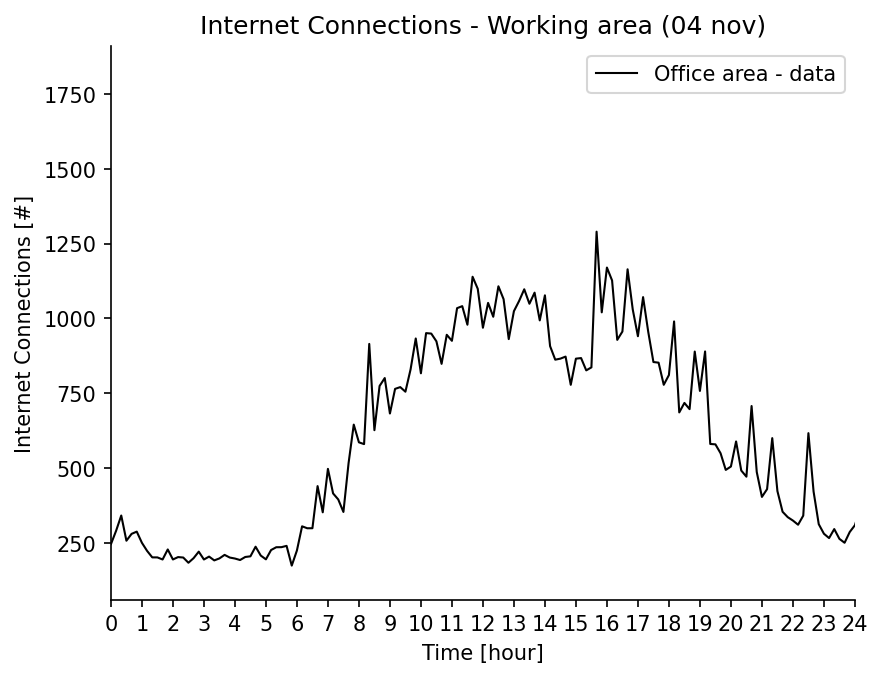

In [7]:
#Office area - industrial zone
ydatai1 = dfgr[dfgr.cellid==5434]['internet']
xdatai1 = dfgr[dfgr.cellid==5434]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24]) #working day - weekday
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine() #removes right and top spines from the plot
plt.savefig('./wday-time2/int-work.png')
plt.show()

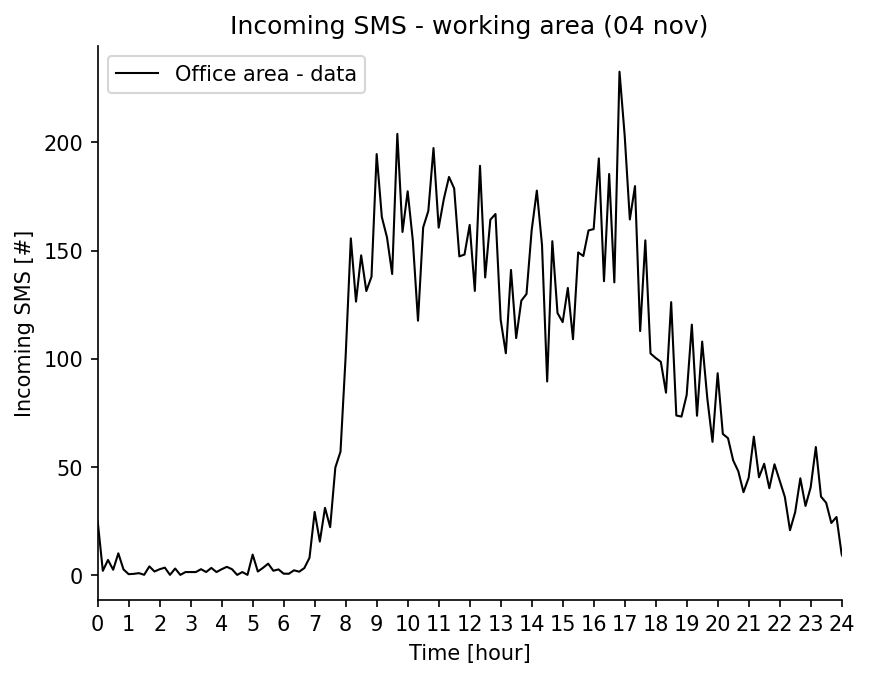

In [8]:

ydatasi1 = dfgr[dfgr.cellid==5434]['smsin']
xdatasi1 = dfgr[dfgr.cellid==5434]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-work.png')
plt.show()

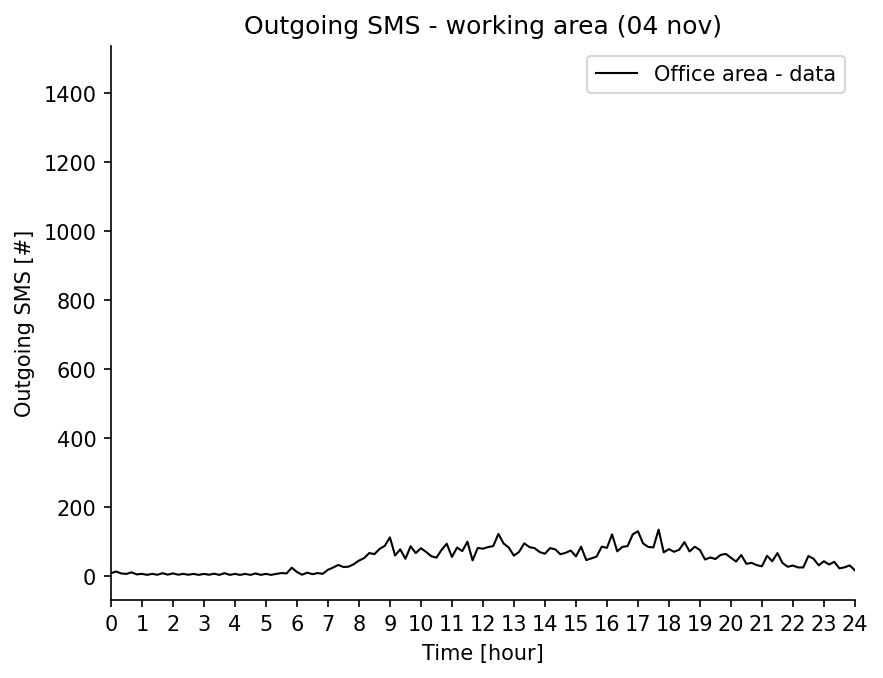

In [9]:

ydataso1 = dfgr[dfgr.cellid==5434]['smsout']
xdataso1 = dfgr[dfgr.cellid==5434]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-work.png')
plt.show()

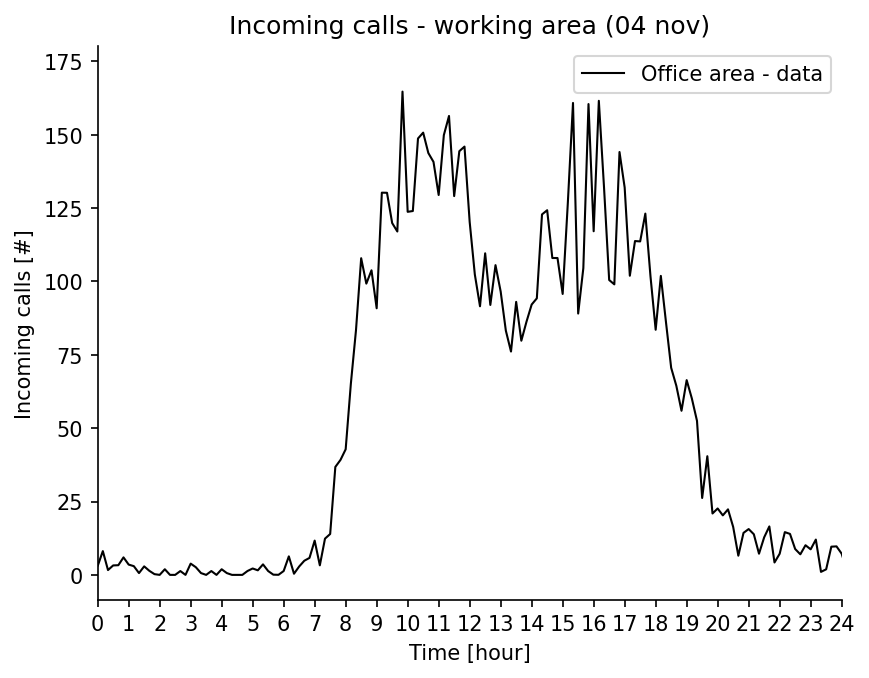

In [10]:

ydataci1 = dfgr[dfgr.cellid==5434]['callin']
xdataci1 = dfgr[dfgr.cellid==5434]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.xlim([0,168])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-work.png')
plt.show()

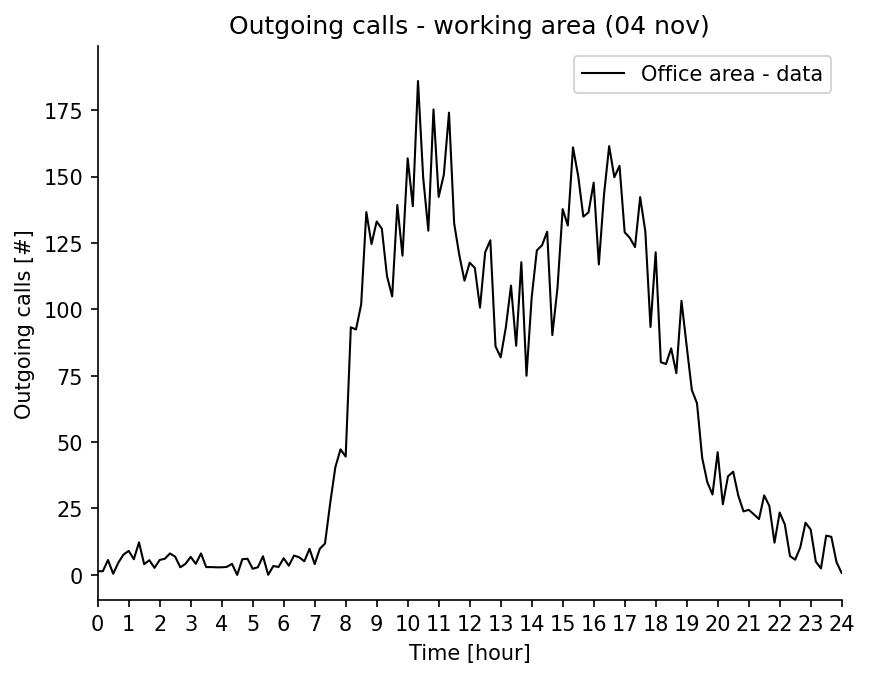

In [11]:

ydataco1 = dfgr[dfgr.cellid==5434]['callout']
xdataco1 = dfgr[dfgr.cellid==5434]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-work.png')
plt.show()

In [12]:
print("CELL 4616 - transport area - airport")

CELL 4616 - transport area - airport


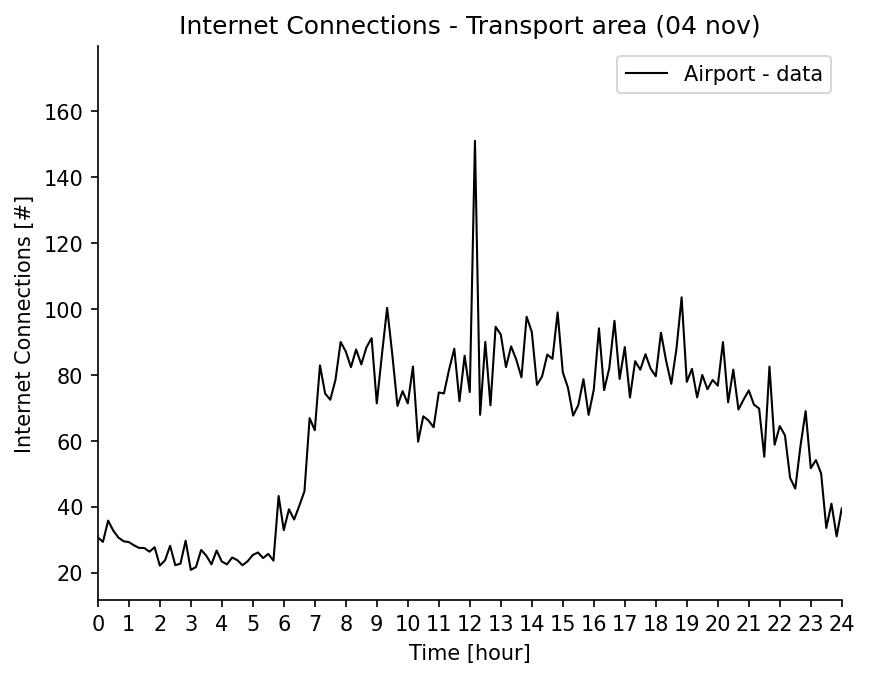

In [13]:
#Transport area (highway) data
ydatai2 = dfgr[dfgr.cellid==4616]['internet']
xdatai2 = dfgr[dfgr.cellid==4616]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Internet Connections - Transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Internet Connections - Transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-trans.png')
plt.show()

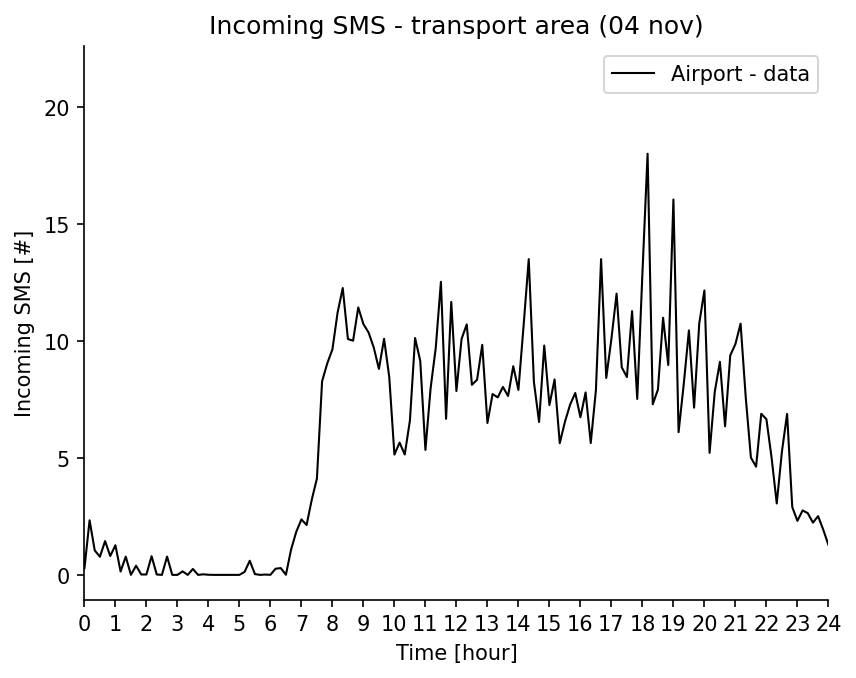

In [14]:

ydatasi2 = dfgr[dfgr.cellid==4616]['smsin']
xdatasi2 = dfgr[dfgr.cellid==4616]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Incoming SMS - transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Incoming SMS - transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-trans.png')
plt.show()

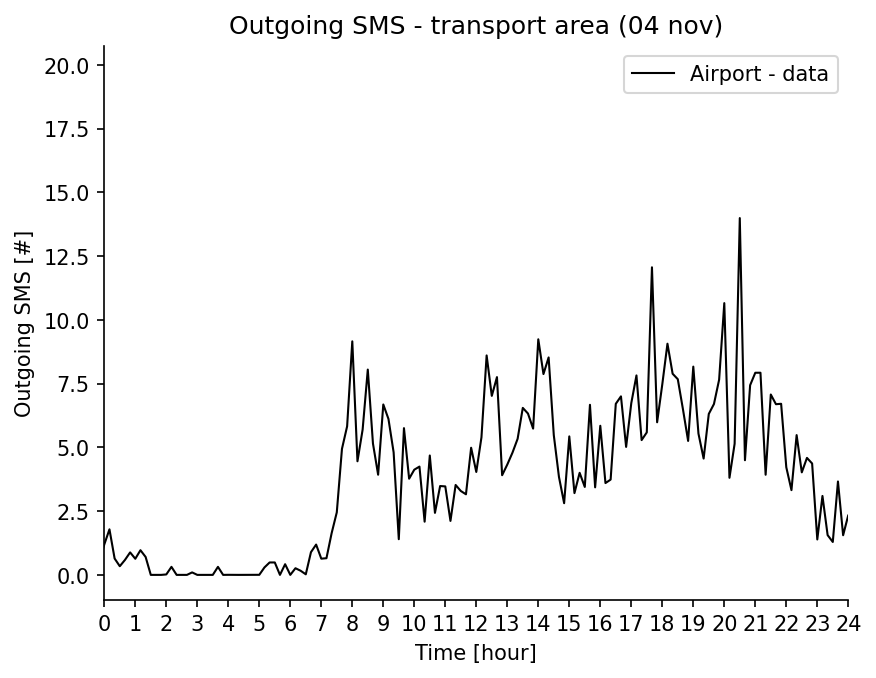

In [15]:

ydataso2 = dfgr[dfgr.cellid==4616]['smsout']
xdataso2 = dfgr[dfgr.cellid==4616]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Outgoing SMS - transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Outgoing SMS - transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-trans.png')
plt.show()

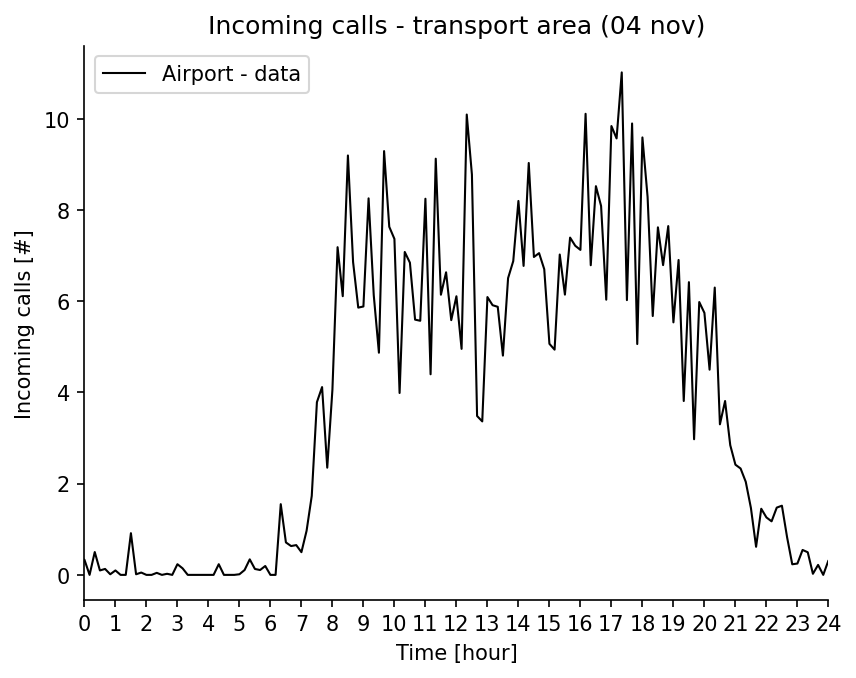

In [16]:

ydataci2 = dfgr[dfgr.cellid==4616]['callin']
xdataci2 = dfgr[dfgr.cellid==4616]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Incoming calls - transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Incoming calls - transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-trans.png')
plt.show()

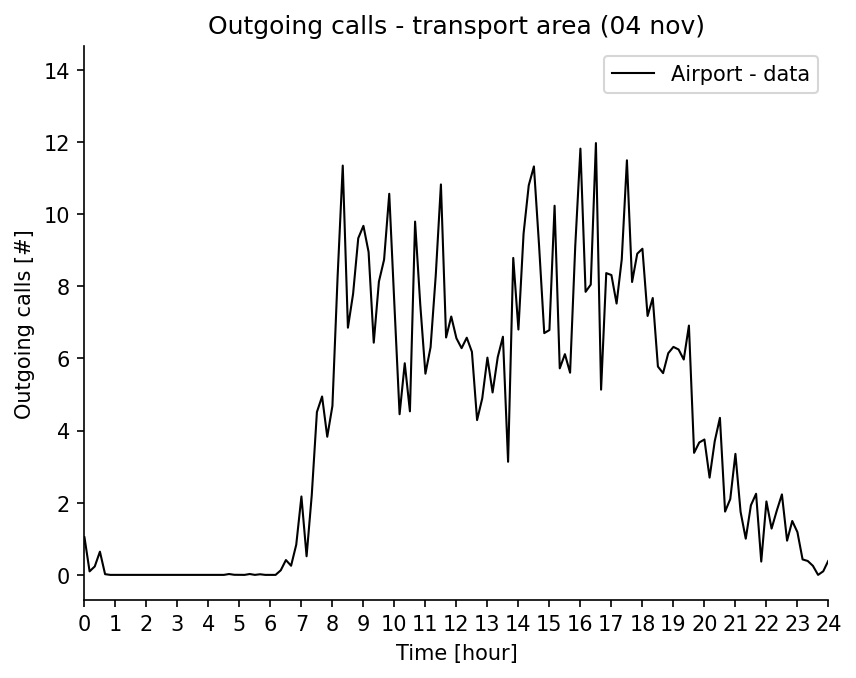

In [17]:

ydataco2 = dfgr[dfgr.cellid==4616]['callout']
xdataco2 = dfgr[dfgr.cellid==4616]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Outgoing calls - transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Airport - data')
plt.title("Outgoing calls - transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-trans.png')
plt.show()

In [18]:
print("CELL 5084 - home area - San Giuseppe")

CELL 5084 - home area - San Giuseppe


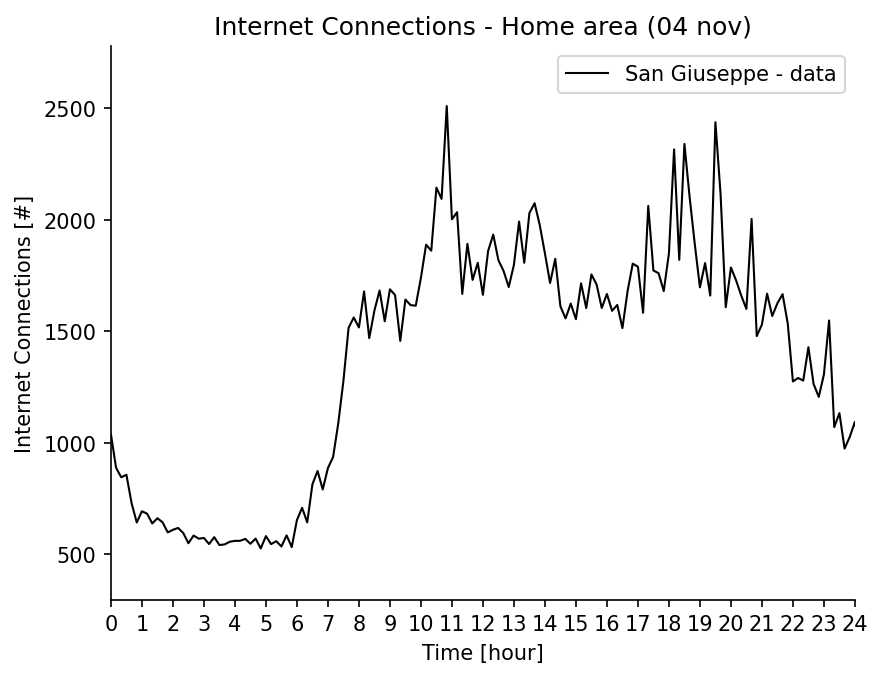

In [19]:
#Home area (near San Giuseppe) data
ydatai3 = dfgr[dfgr.cellid==5084]['internet']
xdatai3 = dfgr[dfgr.cellid==5084]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Internet Connections - Home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-home-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Internet Connections - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-home.png')
plt.show()

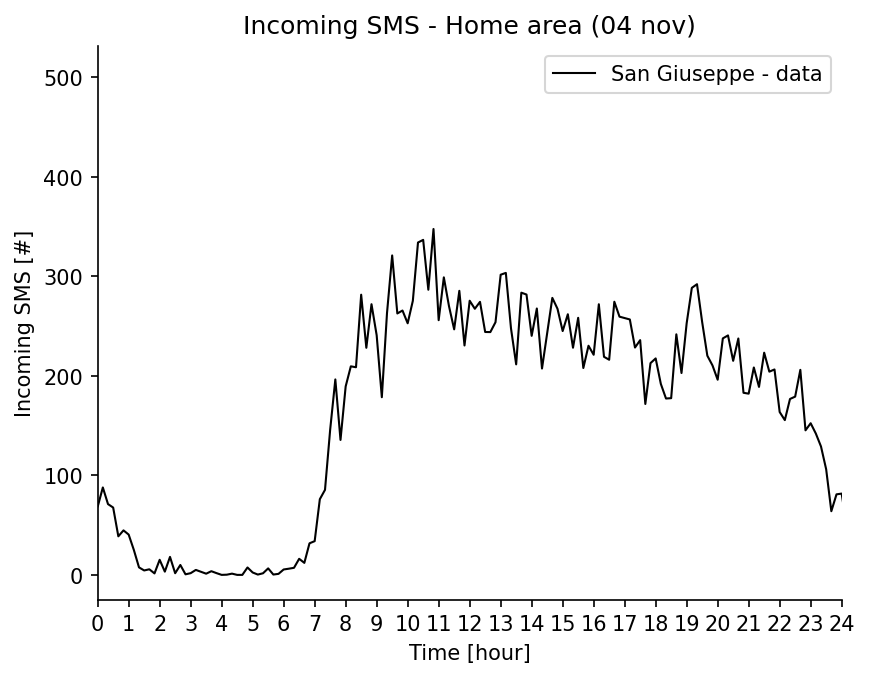

In [20]:

ydatasi3 = dfgr[dfgr.cellid==5084]['smsin']
xdatasi3 = dfgr[dfgr.cellid==5084]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Incoming SMS - Home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Incoming SMS - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-home.png')
plt.show()

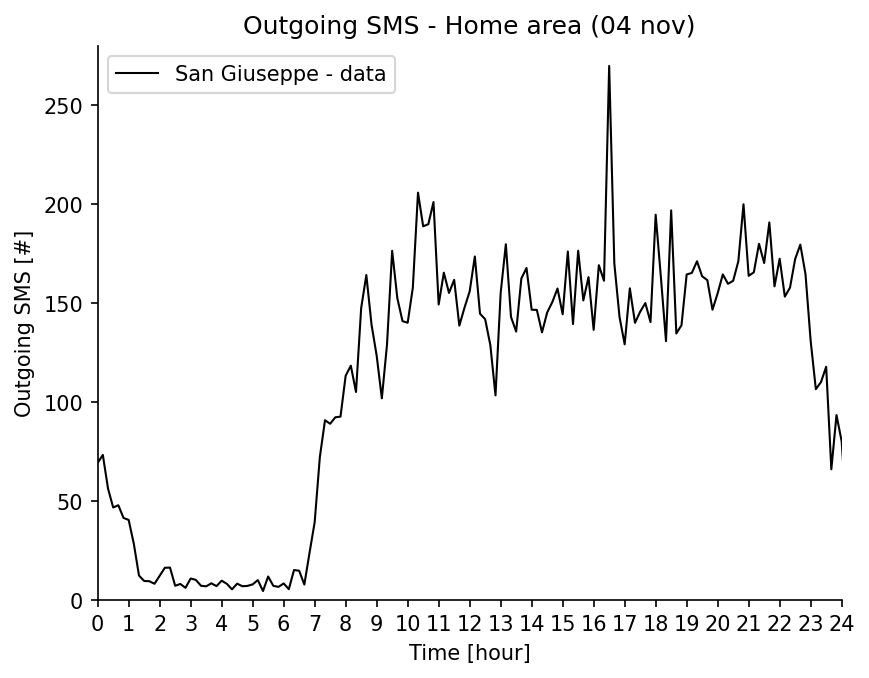

In [38]:

ydataso3 = dfgr[dfgr.cellid==5084]['smsout']
xdataso3 = dfgr[dfgr.cellid==5084]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Outgoing SMS - Home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Outgoing SMS - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.ylim([0, 280])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-home.png')
plt.show()

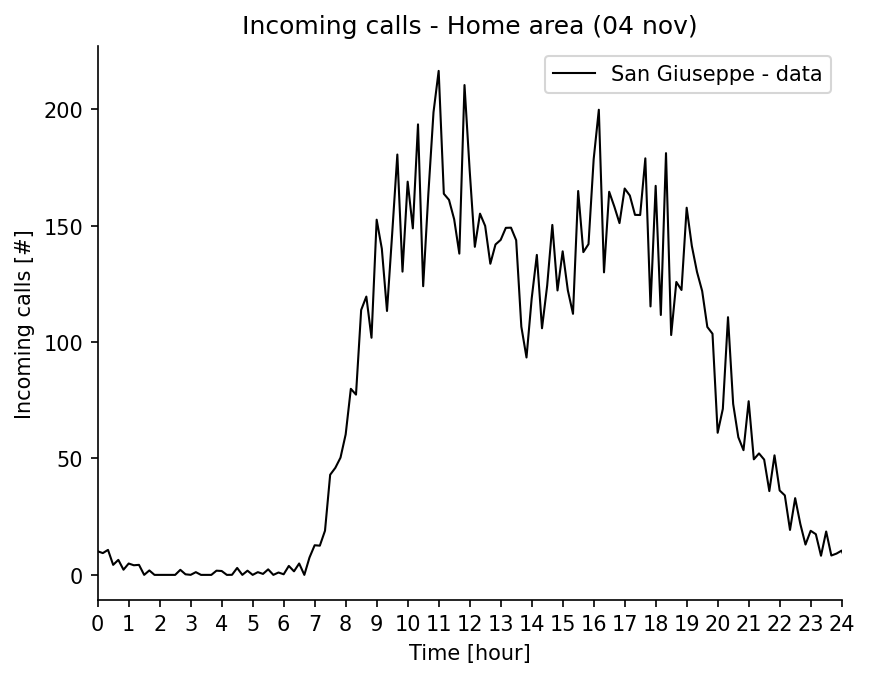

In [22]:

ydataci3 = dfgr[dfgr.cellid==5084]['callin']
xdataci3 = dfgr[dfgr.cellid==5084]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Incoming calls - Home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Incoming calls - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-home.png')
plt.show()

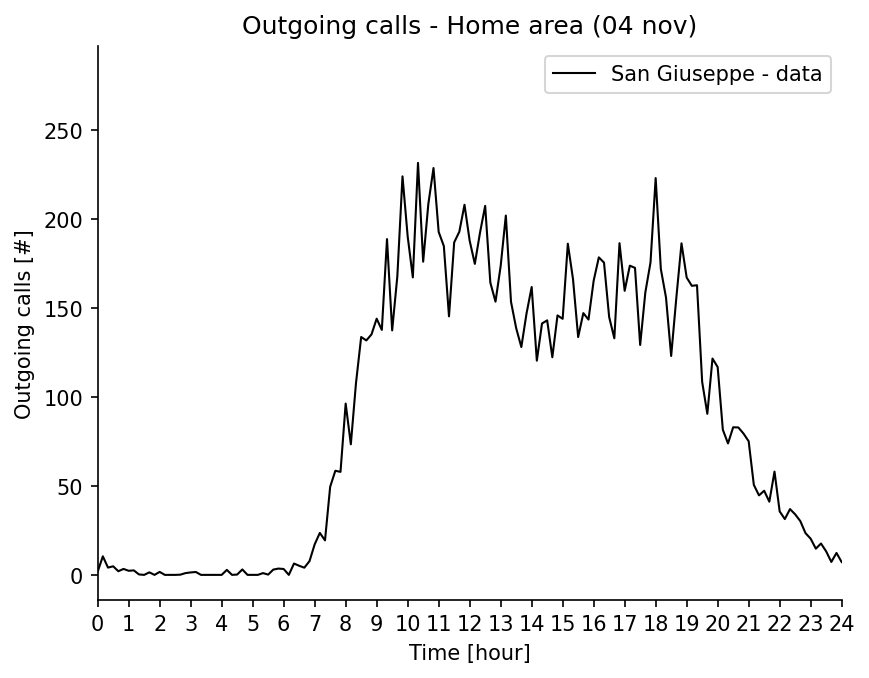

In [23]:

ydataco3 = dfgr[dfgr.cellid==5084]['callout']
xdataco3 = dfgr[dfgr.cellid==5084]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Outgoing calls - home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='San Giuseppe - data')
plt.title("Outgoing calls - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-home.png')
plt.show()

In [24]:
print("CELL 4620 - forest area - Marzola sud")

CELL 4620 - forest area - Marzola sud


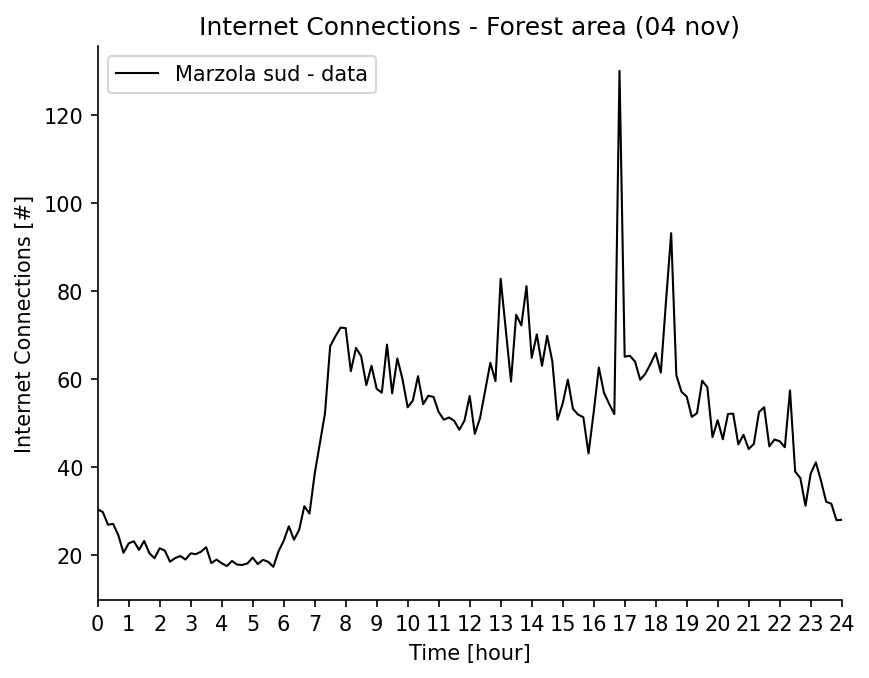

In [25]:
#Forest data
ydatai4 = dfgr[dfgr.cellid==4620]['internet']
xdatai4 = dfgr[dfgr.cellid==4620]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Internet Connections - Forest area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-forest-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Internet Connections - Forest area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-forest.png')
plt.show()

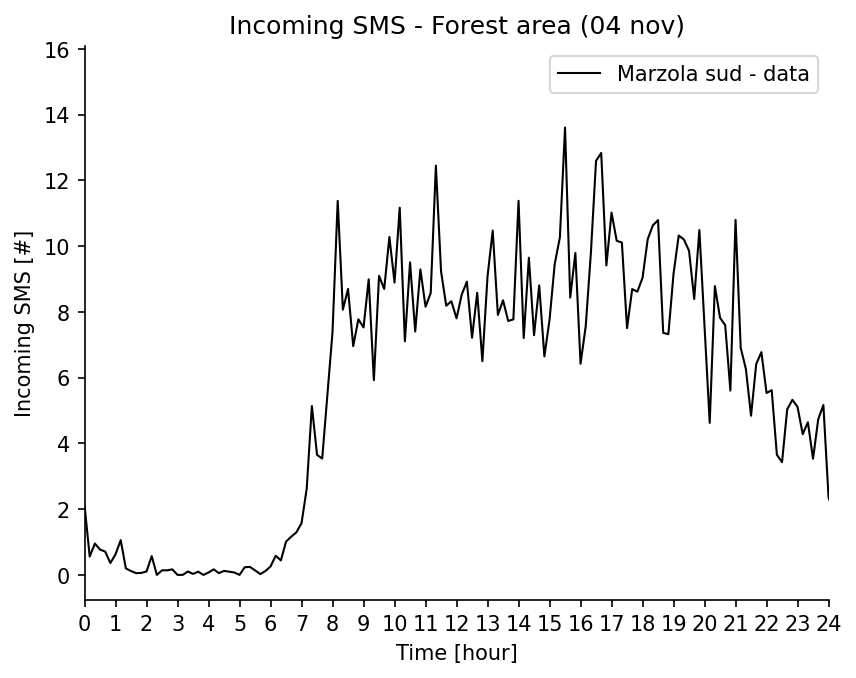

In [26]:
#Forest data
ydatai4 = dfgr[dfgr.cellid==4620]['smsin']
xdatai4 = dfgr[dfgr.cellid==4620]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Incoming SMS - Forest area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-forest-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Incoming SMS - Forest area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-forest.png')
plt.show()

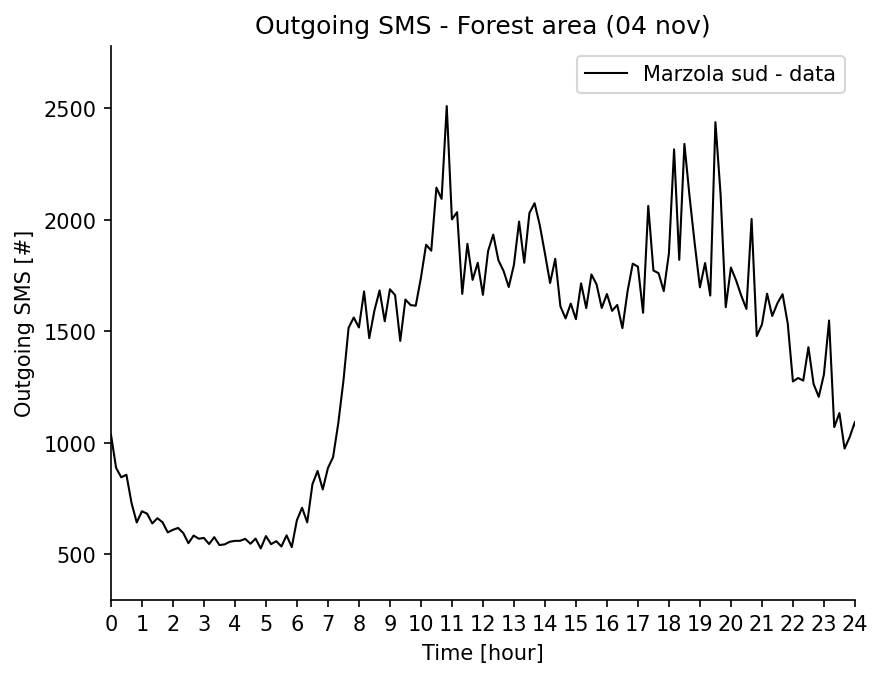

In [27]:
#Forest data
ydatai4 = dfgr[dfgr.cellid==4620]['smsout']
xdatai4 = dfgr[dfgr.cellid==4620]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Outgoing SMS - Forest area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-forest-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Outgoing SMS - Forest area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-forest.png')
plt.show()

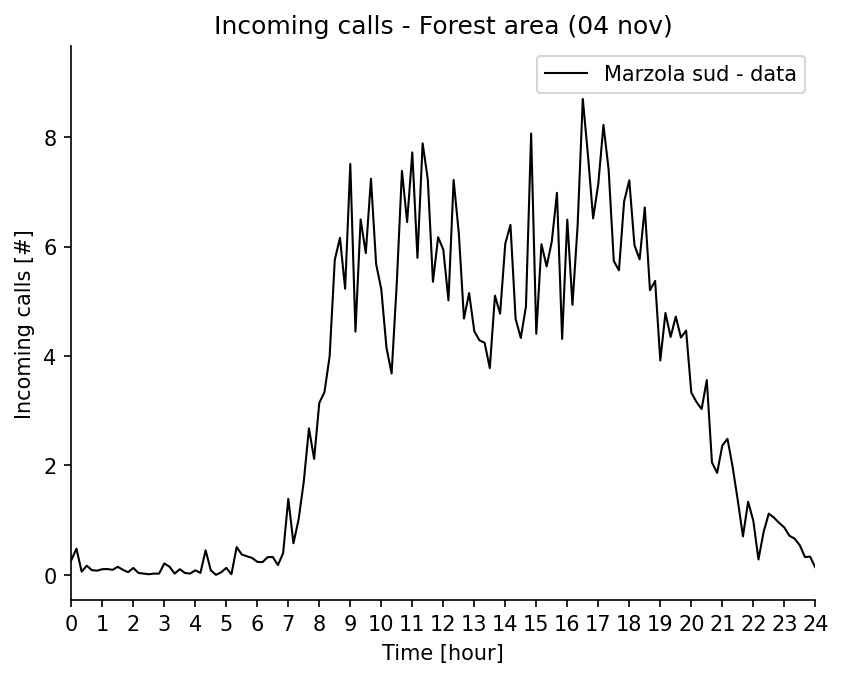

In [28]:
#Forest data
ydatai4 = dfgr[dfgr.cellid==4620]['callin']
xdatai4 = dfgr[dfgr.cellid==4620]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Incoming calls - Forest area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-forest-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Incoming calls - Forest area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-forest.png')
plt.show()

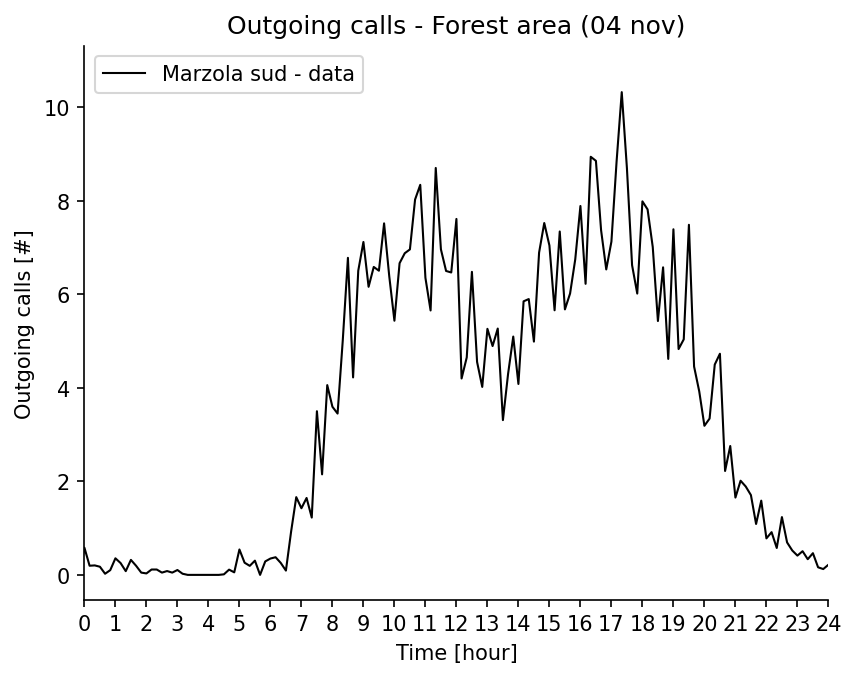

In [29]:
#Forest data
ydatai4 = dfgr[dfgr.cellid==4620]['callout']
xdatai4 = dfgr[dfgr.cellid==4620]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Outgoing calls - Forest area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-forest-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='Marzola sud - data')
plt.title("Outgoing calls - Forest area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-forest.png')
plt.show()

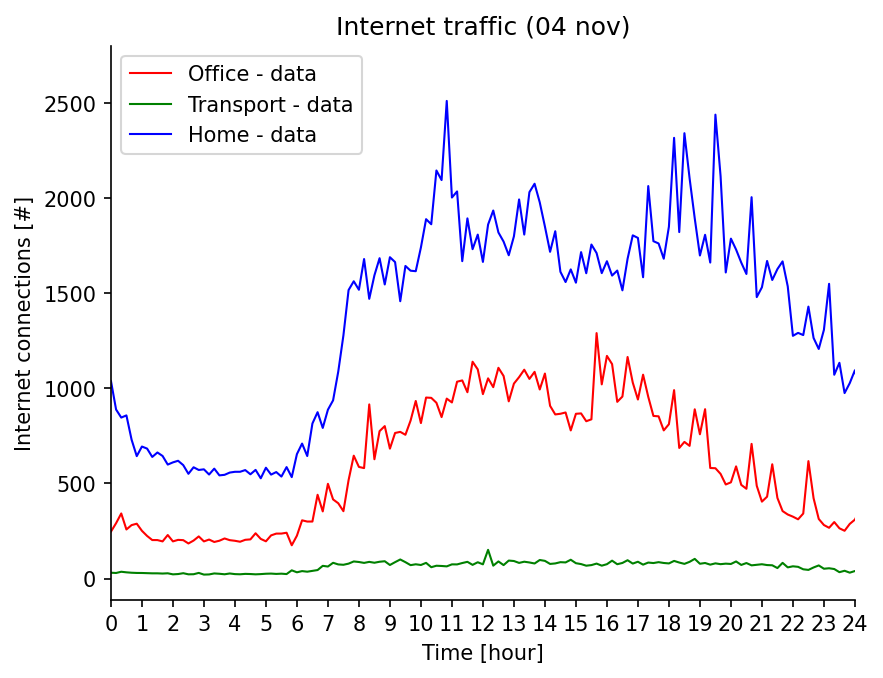

In [30]:
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatai2, ydatai2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatai3, ydatai3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Internet traffic (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet connections [#]")
plt.xlim([96,96+24])
#plt.ylim([0,200])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/internet-comparative.png')
plt.show()

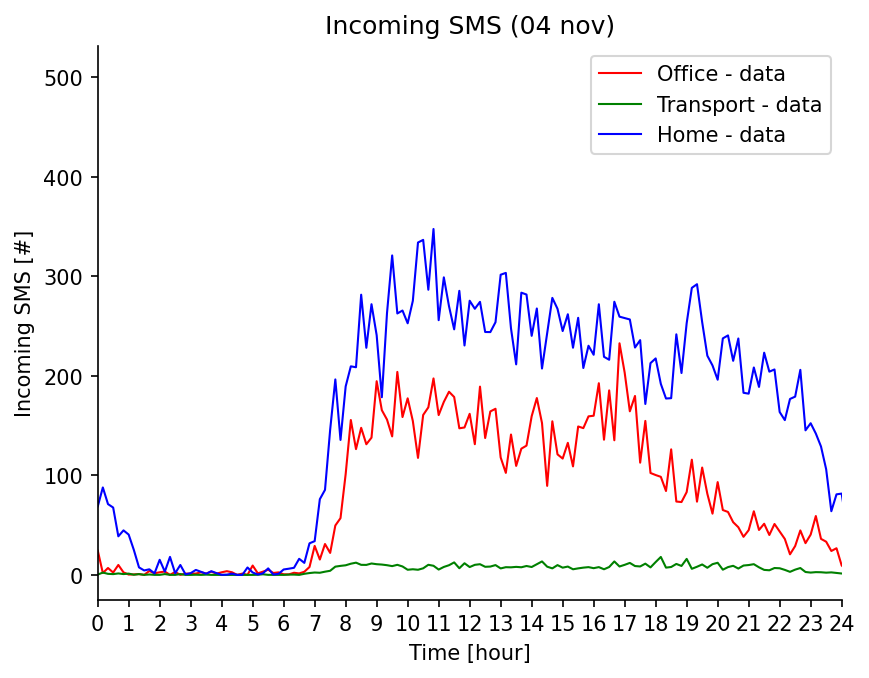

In [31]:
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatasi2, ydatasi2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatasi3, ydatasi3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming SMS (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-comparative.png')
plt.show()

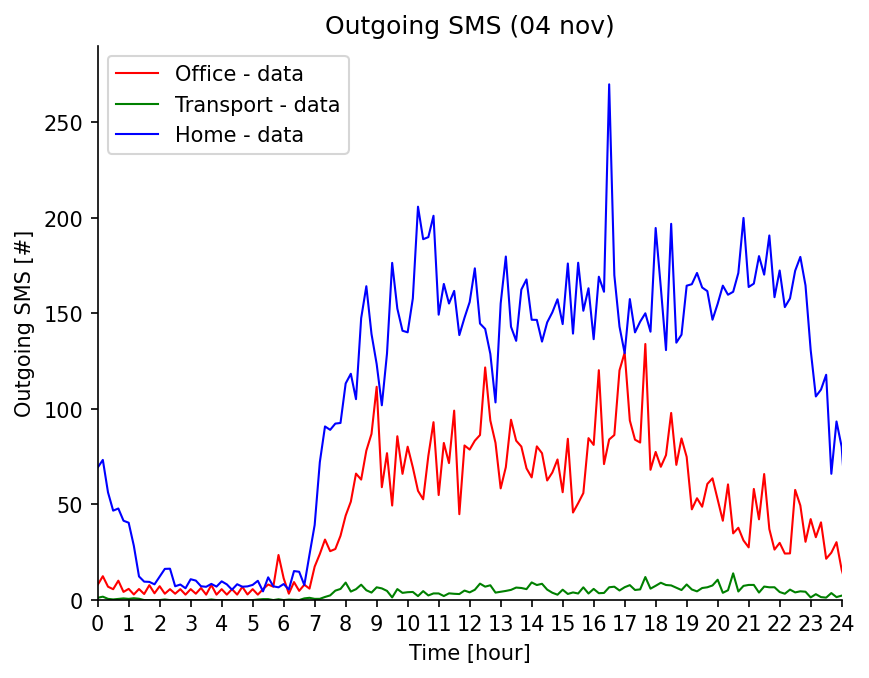

In [32]:
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataso2, ydataso2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataso3, ydataso3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing SMS (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.ylim([0,290])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-comparative.png')
plt.show()

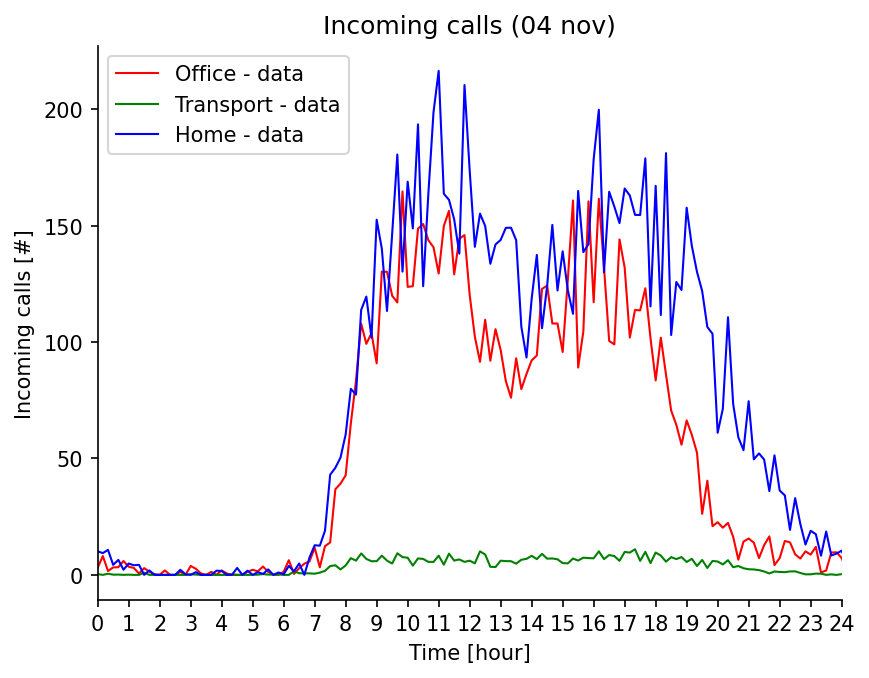

In [33]:
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataci2, ydataci2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataci3, ydataci3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming calls (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-comparative.png')
plt.show()

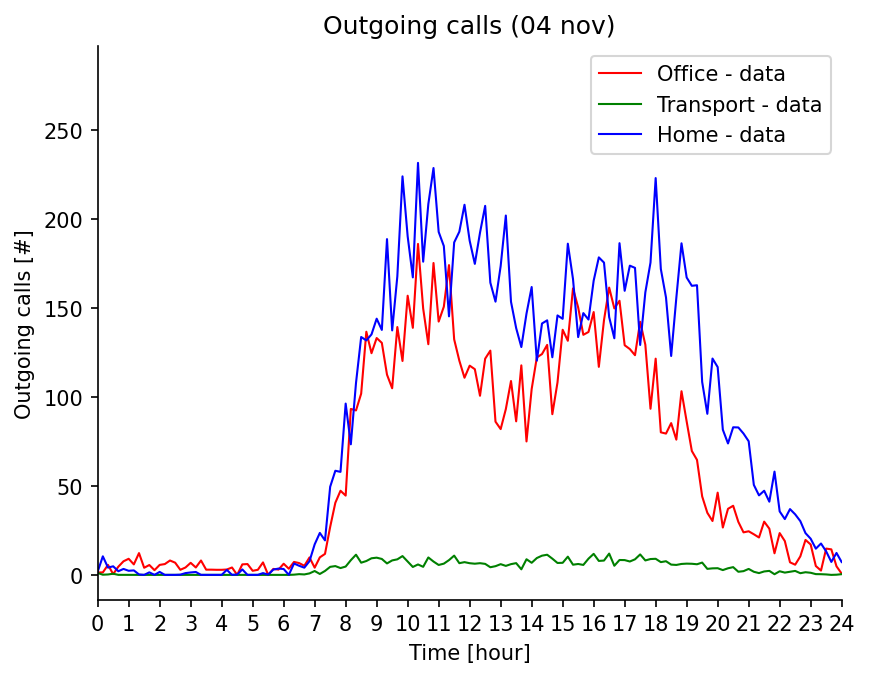

In [34]:
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataco2, ydataco2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataco3, ydataco3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing calls (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-comparative.png')
plt.show()